## Sample 4.3 Random drawing samples from a normal distribution

Normal distribution
mu=1.000	sigma^2=9.000
From numpy: E(x)=0.985	D(x)=9.040
From scipy: E(x)=1.003	D(x)=8.960


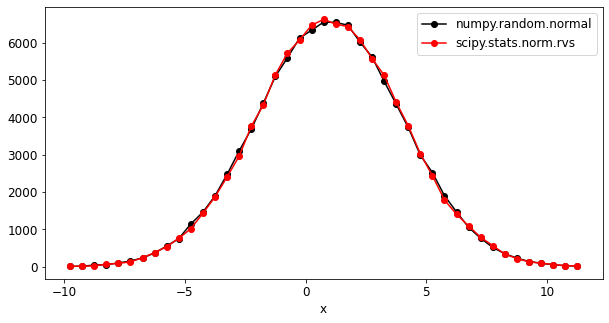

In [41]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

#generate random number following a normal 
# density with location of 1.0 and scale of 3.0
mu = 1.0
sigma2 = 9.0
sigma = np.sqrt(sigma2)
#method 1: use numpy random to generate normal random samples 
x1 = np.random.normal(loc=mu,scale=sigma,size=100000)

#method 2: use scipy stats to generate normal random samples
pnorm = stats.norm(loc=mu, scale=sigma)
x2 = pnorm.rvs(size=100000)

#analyze the random samples with a histogram
xgrid = np.arange(-10,12,0.5)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2.         
hx1,xedge = np.histogram(x1,xgrid)
hx2,xedge = np.histogram(x2,xgrid)

#draw the histogram
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
e1, = ax.plot(xcenter,hx1,'ko-')
e2, = ax.plot(xcenter,hx2,'ro-')
#you can add legends for symbols in the figure like this
plt.legend([e1,e2],['numpy.random.normal','scipy.stats.norm.rvs'],\
           fontsize=12)
ax.set_xlabel('x',fontsize=12)
# fig.show()
fig.savefig('normrand_hist.png',bbox_inches='tight')

print('Normal distribution')
print('mu=%(mu).3f\tsigma^2=%(sig).3f' %{'mu':mu,'sig':sigma2})
print('From numpy: E(x)=%(m).3f\tD(x)=%(d).3f' % {'m':np.mean(x1), 'd':np.var(x1)})
print('From scipy: E(x)=%(m).3f\tD(x)=%(d).3f' % {'m':np.mean(x2), 'd':np.var(x2)})

Text(0.5, 0, 'x')

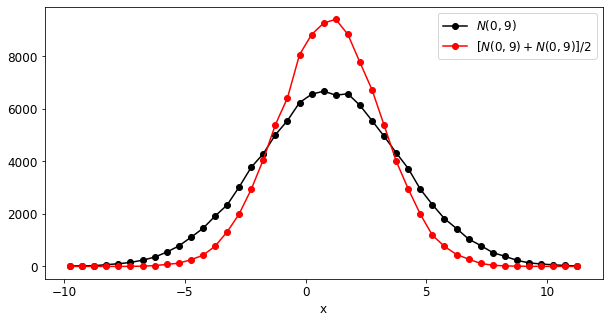

In [38]:
'''
average of two Normal samples obtain a new random normal sample with narrower distribution
'''
y = (x1+x2)/2

#xgrid is same as above
hy,xedge = np.histogram(y,xgrid)

#draw the histogram
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
e1, = ax.plot(xcenter,hx2,'ko-')
e2, = ax.plot(xcenter,hy,'ro-')
plt.legend([e1,e2],[r'$N(0,9)$',r'$[N(0,9)+N(0,9)]/2$'],fontsize=12)
ax.set_xlabel('x',fontsize=12)
# fig.show()

Text(0.5, 0, 'x')

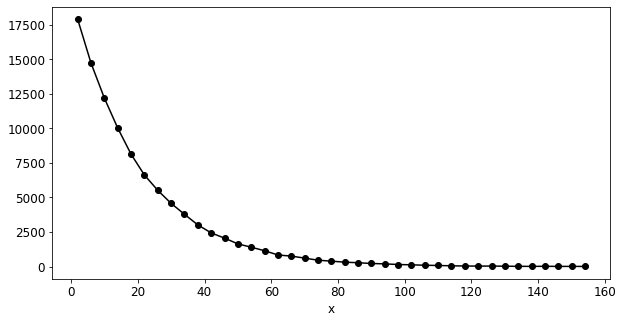

In [32]:
'''
sum of squared follows chi-2 distribution
'''

z = (x1**2+x2**2)

xgrid = np.arange(0,160,4)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2.         
hz,xedge = np.histogram(z,xgrid)

#draw the histogram
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
e1, = ax.plot(xcenter,hz,'ko-')
ax.set_xlabel('x',fontsize=12)
# fig.show()

<ipython-input-40-e834875d1ff5>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


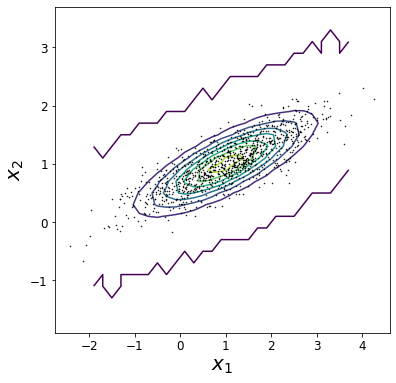

In [40]:
'''
random draw a sample following a 2D Gaussian distribution
'''


mu = np.array([1.,1.])
s1 = 1. #sigma_1^2
s2 = 0.2 #sigma_2^2
rho = 0.8 #rho
sig = np.array([[s1, rho*np.sqrt(s1*s2)],[rho*np.sqrt(s1*s2),s2]]) #covariance matrix

xx = np.random.multivariate_normal(mu,sig,1000000) #generate random numbers from 2D normal distribution

xgrid = np.arange(-2.,4.,0.2)
ygrid = np.arange(-2.,4.,0.2)
xcenter = (xgrid[0:-1]+xgrid[1:])/2.
ycenter = (ygrid[0:-1]+ygrid[1:])/2.
#make 2d histogram
hxx,xedge,yedge = np.histogram2d(xx[:,0],xx[:,1],bins=[xgrid,ygrid])

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111)
ax.plot(xx[0:1000,0],xx[0:1000,1],'k.',markersize=1)#random number
ax.contour(xcenter,ycenter,hxx.T)#contour
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)
fig.show()

